<a href="https://colab.research.google.com/github/DangPhan23/DangPhan23-Homework_AI/blob/main/Fuzzy_Logic_Based_Clinical_Decision_Support_System_For_The_Evaluation_Of_Renal_Function_In_Post_Transplant_Patients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=d2d9e1f870839c17813ea0893db83cea997ab002f661f74f8547890fd60ff1e6
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


1099.999999999964


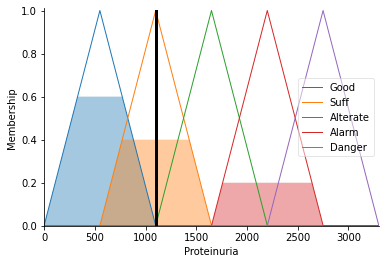

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
Glycaemia=ctrl.Antecedent(np.arange(50,151,1),'Glycaemia')
Sirolimus=ctrl.Antecedent(np.arange(0,16,0.1),'Sirolimus')
Proteinuria=ctrl.Consequent(np.arange(0,3301,1),'Proteinuria')

Glycaemia['Good']=fuzz.trimf(Glycaemia.universe, [75,100,125])
Glycaemia['Alarm']=fuzz.trimf(Glycaemia.universe, [100,125,150])
Glycaemia['Danger']=fuzz.trimf(Glycaemia.universe, [50,75,100])

Sirolimus['Alarm_Down']=fuzz.trimf(Sirolimus.universe, [0,2.5,5])
Sirolimus['Suff']=fuzz.trimf(Sirolimus.universe, [2.5,5,7.5])
Sirolimus['Good']=fuzz.trimf(Sirolimus.universe, [5,7.5,10])
Sirolimus['Alarm_Up']=fuzz.trimf(Sirolimus.universe, [7.5,10,12.5])
Sirolimus['Danger']=fuzz.trimf(Sirolimus.universe, [10,12.5,15])

Proteinuria['Good']=fuzz.trimf(Proteinuria.universe, [0,550,1100])
Proteinuria['Suff']=fuzz.trimf(Proteinuria.universe, [550,1100,1650])
Proteinuria['Alterate']=fuzz.trimf(Proteinuria.universe, [1100,1650,2200])
Proteinuria['Alarm']=fuzz.trimf(Proteinuria.universe, [1650,2200,2750])
Proteinuria['Danger']=fuzz.trimf(Proteinuria.universe, [2200,2750,3300])

rule1 = ctrl.Rule(Glycaemia['Good']&Sirolimus['Good'], Proteinuria['Good'])
rule2 = ctrl.Rule(Glycaemia['Danger']&Sirolimus['Danger'], Proteinuria['Danger'])
rule3 = ctrl.Rule(Glycaemia['Good']&Sirolimus['Suff'], Proteinuria['Suff'])
rule4 = ctrl.Rule(Glycaemia['Alarm']&Sirolimus['Alarm_Up'], Proteinuria['Suff'])

rule5 = ctrl.Rule(Glycaemia['Alarm']&Sirolimus['Suff'], Proteinuria['Alarm'])
rule6 = ctrl.Rule(Glycaemia['Good']&Sirolimus['Alarm_Up'], Proteinuria['Alterate'])
rule7 = ctrl.Rule(Glycaemia['Alarm']&Sirolimus['Good'], Proteinuria['Suff'])
rule8 = ctrl.Rule(Glycaemia['Good']&Sirolimus['Alarm_Down'], Proteinuria['Suff'])

Proteinuria_control = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8])
Proteinuria_simulation = ctrl.ControlSystemSimulation(Proteinuria_control)
Proteinuria_simulation.input['Glycaemia'] = 110
Proteinuria_simulation.input['Sirolimus'] = 7
Proteinuria_simulation.compute()
print(Proteinuria_simulation.output['Proteinuria'])
Proteinuria.view(sim=Proteinuria_simulation)